In [84]:
import pandas as pd
import numpy as np

In [85]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [86]:
print("Train: ",train_df.shape)
print("Test: ",test_df.shape)

Train:  (8693, 14)
Test:  (4277, 13)


In [87]:
def missing_data(data):

    count = data.isnull().sum().sort_values(ascending=False)
    percentage = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending=False)

    missing_info = pd.concat([count,percentage],keys=['Total','Percentage'],axis=1,)

    missing_info = missing_info[missing_info['Percentage'] > 0]

    return missing_info

In [88]:
def get_missing_info():
    print('---'*10)
    print('Missing Data: Training')
    print('---'*10)
    print(missing_data(train_df))
    print()
    print('---'*10)
    print('Missing Data: Testing')
    print('---'*10)
    print(missing_data(test_df))

In [89]:
get_missing_info()

------------------------------
Missing Data: Training
------------------------------
              Total  Percentage
CryoSleep       217    2.496261
ShoppingMall    208    2.392730
VIP             203    2.335212
HomePlanet      201    2.312205
Name            200    2.300702
Cabin           199    2.289198
VRDeck          188    2.162660
FoodCourt       183    2.105142
Spa             183    2.105142
Destination     182    2.093639
RoomService     181    2.082135
Age             179    2.059128

------------------------------
Missing Data: Testing
------------------------------
              Total  Percentage
FoodCourt       106    2.478373
Spa             101    2.361468
Cabin           100    2.338087
ShoppingMall     98    2.291326
Name             94    2.197802
CryoSleep        93    2.174421
VIP              93    2.174421
Destination      92    2.151040
Age              91    2.127660
HomePlanet       87    2.034136
RoomService      82    1.917232
VRDeck           80    1.87047

In [90]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [91]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [92]:
train_df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [93]:
train_df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [94]:
destination_train = pd.get_dummies(train_df['Destination'])
destination_test = pd.get_dummies(test_df['Destination'])

home_train = pd.get_dummies(train_df['HomePlanet'])
home_test = pd.get_dummies(test_df['HomePlanet'])

In [95]:
new_train = pd.concat([destination_train,home_train],axis=1)
new_test = pd.concat([destination_test,home_test],axis=1)

In [96]:
train_df = pd.concat([train_df,new_train],axis=1)
test_df = pd.concat([test_df,new_test],axis=1)

In [97]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Earth,Europa,Mars
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0,1,0,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,1,1,0,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,0,1,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,0,1,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,1,1,0,0


In [98]:
print(train_df.shape)
print(test_df.shape)

(8693, 20)
(4277, 19)


In [99]:
drop_col = ['HomePlanet','Destination']

train_df.drop(drop_col,axis=1,inplace=True)
test_df.drop(drop_col,axis=1,inplace=True)

In [100]:
print(train_df.shape)
print(test_df.shape)

(8693, 18)
(4277, 17)


In [101]:
cryo_train = pd.get_dummies(train_df['CryoSleep'],drop_first=True)
cryo_test = pd.get_dummies(test_df['CryoSleep'],drop_first=True)

vip_train = pd.get_dummies(train_df['VIP'],drop_first=True)
vip_test = pd.get_dummies(test_df['VIP'],drop_first=True)

In [102]:
drop_col = ['CryoSleep','VIP']

train_df.drop(drop_col,axis=1,inplace=True)
test_df.drop(drop_col,axis=1,inplace=True)

In [103]:
new_train_1 = pd.concat([cryo_train,vip_train],axis=1,keys=['CryoSleep','VIP'])
new_test_1 = pd.concat([cryo_test,vip_test],axis=1,keys=['CryoSleep','VIP'])

In [104]:
train_df = pd.concat([train_df,new_train_1],axis=1)
test_df = pd.concat([test_df,new_test_1],axis=1)

In [105]:
train_df.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Earth,Europa,Mars,"(CryoSleep, True)","(VIP, True)"
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,0,1,0,1,0,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,0,1,1,0,0,0,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,0,1,0,0,1
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,0,1,0,0,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,0,1,1,0,0,0,0


In [108]:
test_df.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,55 Cancri e,PSO J318.5-22,TRAPPIST-1e,Earth,Europa,Mars,"(CryoSleep, True)","(VIP, True)"
0,0013_01,G/3/S,27.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,0,1,1,0,0,1,0
1,0018_01,F/4/S,19.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,0,1,1,0,0,0,0
2,0019_01,C/0/S,31.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1,0,0,0,1,0,1,0
3,0021_01,C/1/S,38.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,0,1,0,1,0,0,0
4,0023_01,F/5/S,20.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,0,1,1,0,0,0,0


In [106]:
print(train_df.shape)
print(test_df.shape)

(8693, 18)
(4277, 17)


In [112]:
drop_col = ['PassengerId','Cabin','Name']

train_df.drop(drop_col,axis=1,inplace=True)
test_df.drop(drop_col,axis=1,inplace=True)

In [114]:
get_missing_info()

------------------------------
Missing Data: Training
------------------------------
              Total  Percentage
ShoppingMall    208    2.392730
VRDeck          188    2.162660
FoodCourt       183    2.105142
Spa             183    2.105142
RoomService     181    2.082135
Age             179    2.059128

------------------------------
Missing Data: Testing
------------------------------
              Total  Percentage
FoodCourt       106    2.478373
Spa             101    2.361468
ShoppingMall     98    2.291326
Age              91    2.127660
RoomService      82    1.917232
VRDeck           80    1.870470


In [128]:
train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean(),inplace=True)
train_df['VRDeck'].fillna(train_df['VRDeck'].mean(),inplace=True)
train_df['FoodCourt'].fillna(train_df['FoodCourt'].mean(),inplace=True)
train_df['Spa'].fillna(train_df['Spa'].mean(),inplace=True)
train_df['RoomService'].fillna(train_df['RoomService'].mean(),inplace=True)
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)

In [129]:
test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].mean(),inplace=True)
test_df['VRDeck'].fillna(test_df['VRDeck'].mean(),inplace=True)
test_df['FoodCourt'].fillna(test_df['FoodCourt'].mean(),inplace=True)
test_df['Spa'].fillna(test_df['Spa'].mean(),inplace=True)
test_df['RoomService'].fillna(test_df['RoomService'].mean(),inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

In [130]:
get_missing_info()

------------------------------
Missing Data: Training
------------------------------
Empty DataFrame
Columns: [Total, Percentage]
Index: []

------------------------------
Missing Data: Testing
------------------------------
Empty DataFrame
Columns: [Total, Percentage]
Index: []


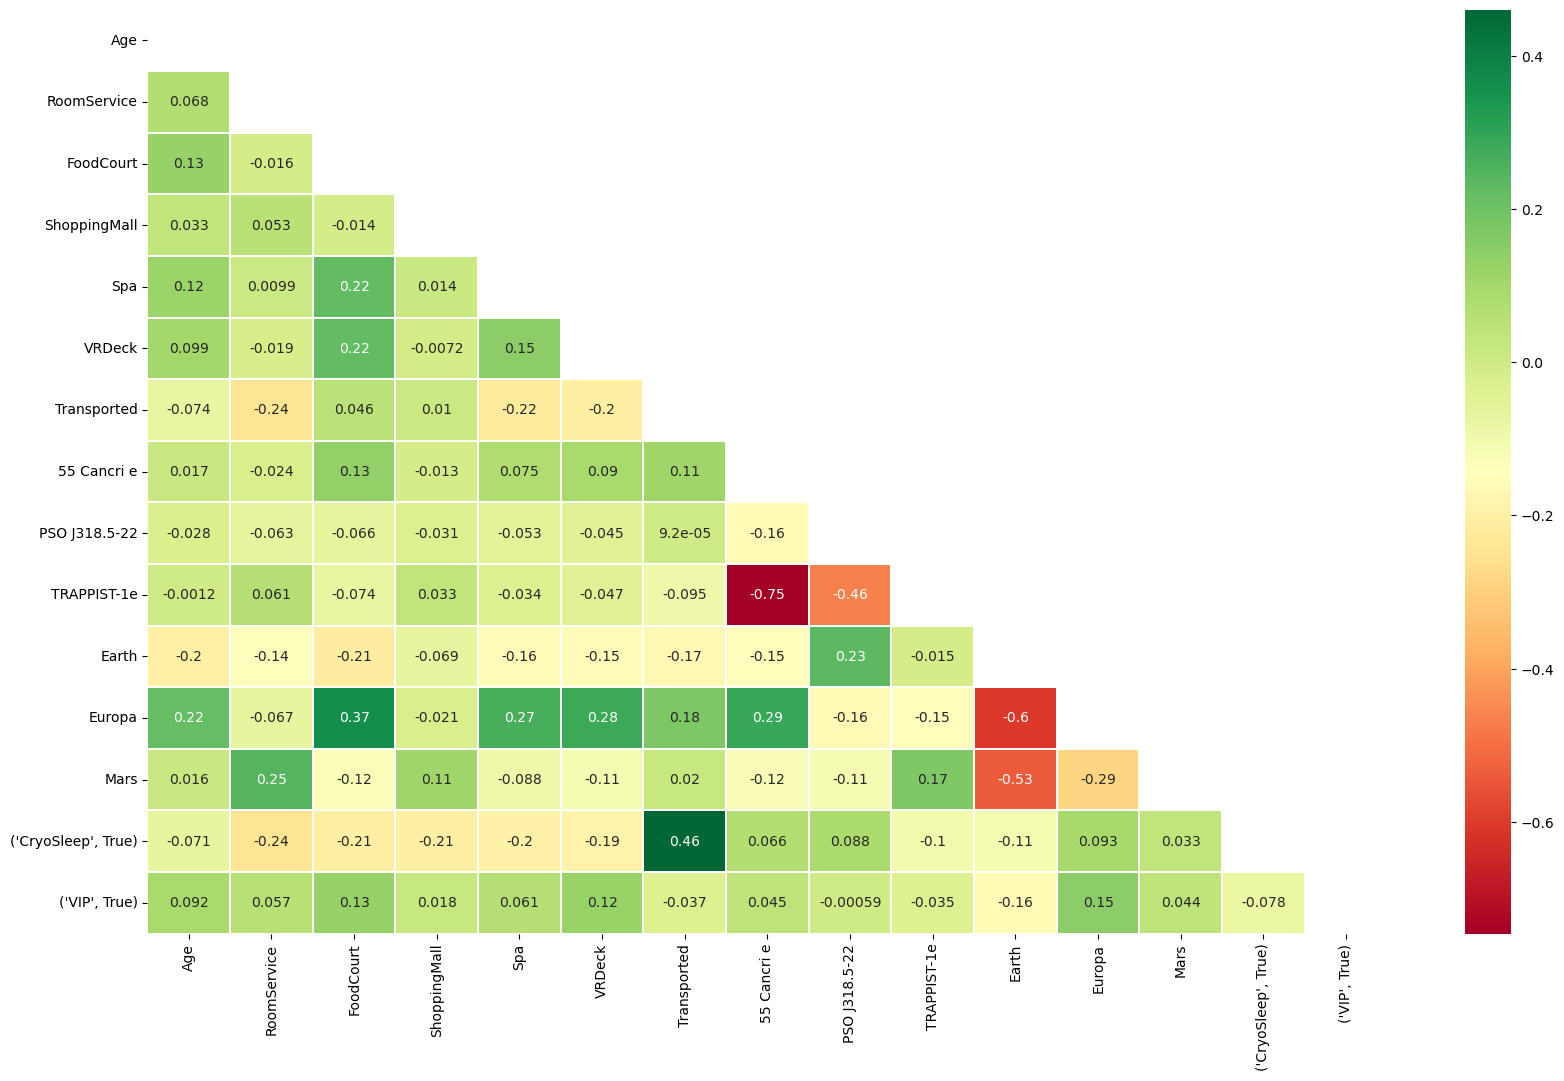

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = np.triu(train_df.corr())
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,mask=matrix)

fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [147]:
train_df.to_csv('train_df.csv',index=False)

In [148]:
df = pd.read_csv('train_df.csv')

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X = df.drop(['Transported'],axis=1)
y = df['Transported']

y = encoder.fit_transform(y)

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=1234,stratify=y)

In [150]:
print("train_x: ",train_x.shape)
print("train_y: ",train_y.shape)
print("test_x: ",test_x.shape)
print("test_x: ",test_y.shape)

train_x:  (6954, 14)
train_y:  (6954,)
test_x:  (1739, 14)
test_x:  (1739,)


In [151]:
train_x.dtypes

Age              float64
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
55 Cancri e        int64
PSO J318.5-22      int64
TRAPPIST-1e        int64
Earth              int64
Europa             int64
Mars               int64
CryoSleep          int64
VIP                int64
dtype: object

In [152]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=150)

In [153]:
model = lr.fit(train_x,train_y)

/Users/kunu/tensorflow-test/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [154]:
y_pred = model.predict(test_x)

In [155]:
from sklearn import metrics

metrics.accuracy_score(test_y,y_pred)

0.777458309373203

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

cv = KFold(n_splits=10,shuffle=True,random_state=1234)

cross_val_score(lr,X,y,cv=cv).mean()

In [158]:
test_df.to_csv('test_df.csv',index=False)